# <center>Lab Work #1.3</center>

In [1]:
'''
    Q.1
        - Generate a normally distributed dataset using numpy.random.normal().
        - Plot a histogram and KDE using seaborn.histplot() or sns.kdeplot().
        - Overlay the mean and standard deviation lines on the plot.
        - Use scipy.stats.norm.pdf() to show the bell curve (optional).
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
df = pd.Series(np.random.normal(100,20,1000))
df.head()

0    109.934283
1     97.234714
2    112.953771
3    130.460597
4     95.316933
dtype: float64

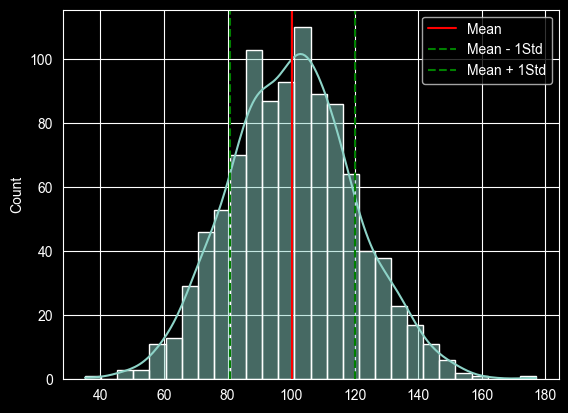

In [2]:
sns.histplot(data=df, kde=True)
plt.axvline(df.mean(), color='r',label='Mean')
plt.axvline(df.mean() - df.std(), color='g',linestyle='--',label='Mean - 1Std')
plt.axvline(df.mean() + df.std(), color='g',linestyle='--',label='Mean + 1Std')
# plt.axvline(df.std(), color='b',label='Standard Deviation')
plt.legend()
plt.show()

In [3]:
'''
    Q.2
        - Load a sample dataset and select a numeric column.
        - Calculate using numpy.percentile() or df.quantile():
            - 25th percentile
            - 50th percentile (median)
            - 75th percentile
        - Plot these quartiles using vertical lines on a boxplot or histogram.

'''

tips = pd.DataFrame(sns.load_dataset('tips'))
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
p25 = tips['total_bill'].quantile(0.25)
p50 = tips['total_bill'].quantile(0.50)
p75 = tips['total_bill'].quantile(0.75)

print(f'25th percentile: {p25:.2f}')
print(f'50th percentile: {p50:.2f}')
print(f'75th percentile: {p75:.2f}')

25th percentile: 13.35
50th percentile: 17.80
75th percentile: 24.13


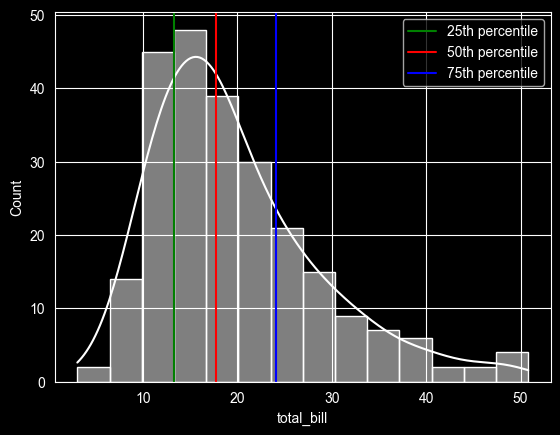

In [5]:
sns.histplot(data=tips['total_bill'], kde=True,color='w')
plt.axvline(p25, color='g',label='25th percentile')
plt.axvline(p50, color='r',label='50th percentile')
plt.axvline(p75, color='b',label='75th percentile')
plt.legend()
plt.show()

In [6]:
'''
    Q.3
        - Print the five-number summary (min, Q1, median, Q3, max) of a column.
        - Create a boxplot using seaborn.boxplot() or matplotlib.
        - Identify and label outliers from the boxplot.
'''
print(f'''
Five-number summary:
    Min: {min(tips['total_bill'])}
    Q1: {p25:.2f}
    Median: {p50:.2f}
    Q3: {p50:.2f}
    Max: {max(tips['total_bill'])}
''')


Five-number summary:
    Min: 3.07
    Q1: 13.35
    Median: 17.80
    Q3: 17.80
    Max: 50.81



<Axes: xlabel='total_bill'>

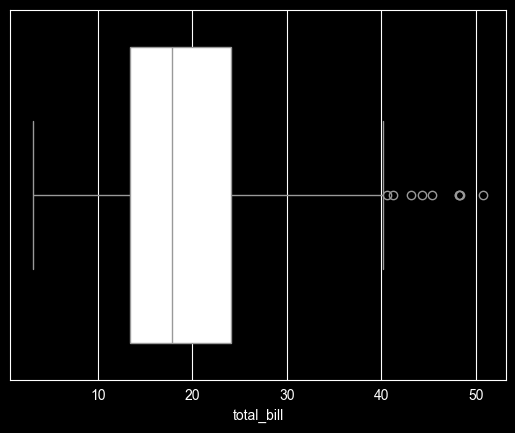

In [7]:
sns.boxplot(data=tips['total_bill'], orient='h',color='w',)

In [12]:
'''
    Q.4
        - Generate 1000 data points from a normal distribution using NumPy.
        - Plot a histogram with KDE using Seaborn to visualize the normal disistribution.
        - Calculate and display the mean and standard deviation of the distribution
        - Generate and compare two normal distributions with different mean and standard deviation.
        - Plot the KDEs of both distributions on the same graph for comparison.

'''

ndf = pd.Series(np.random.normal(50,5,1000))
ndf.head()

0    40.460962
1    45.698075
2    47.931972
3    59.438438
4    52.782766
dtype: float64

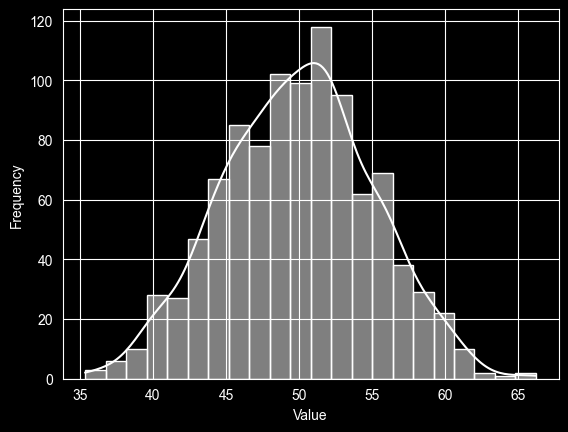

In [14]:
sns.histplot(data=ndf, kde=True, color='w')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

Text(0.5, 0, 'Value')

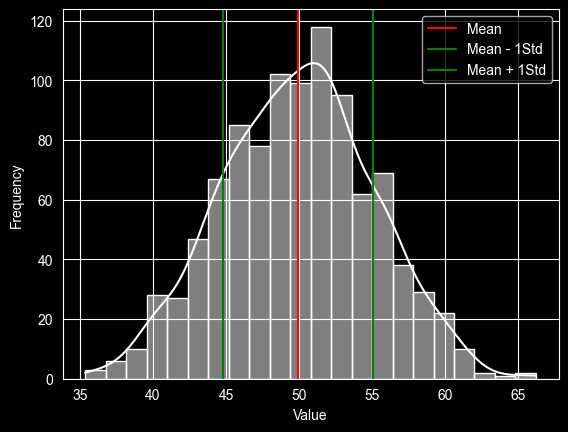

In [16]:
sns.histplot(data=ndf, kde=True, color='w')
plt.axvline(ndf.mean(), color='r',label='Mean')
plt.axvline(ndf.mean() - ndf.std(), color='g',label='Mean - 1Std')
plt.axvline(ndf.mean() + ndf.std(), color='g',label='Mean + 1Std')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Value')

In [19]:
df1 = pd.Series(np.random.normal(70,11,1000))
df1.head()

0    57.745105
1    63.059761
2    59.637338
3    63.972046
4    67.644347
dtype: float64

In [20]:
df2 = pd.Series(np.random.normal(90,21,1000))
df2.head()

0    106.488887
1     52.668700
2    105.009659
3     85.091795
4    104.856612
dtype: float64

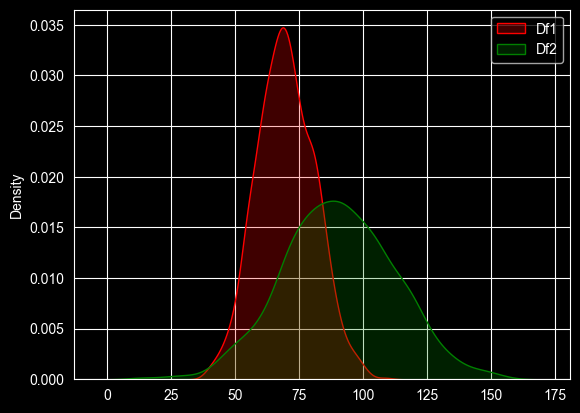

In [25]:
sns.kdeplot(df1, color='r', label = 'Df1', fill=True)
sns.kdeplot(df2, color='g', label = 'Df2', fill=True)
plt.legend()
plt.show()

In [29]:
'''
    Q.5
        - Generate a positively skewed dataset using an exponential distribution.
        - Plot the skewed distribution using Seaborn histogram and KDE.
        - Calculate and print the skewness value using SciPy or Pandas.
        - Interpret whether the dataset is right-skewed, left-skewed, or symmetric based on the skewness value.

'''

positive_skew = pd.Series(np.random.exponential(10,1000))
positive_skew.head()

0    14.567706
1    28.468715
2     2.435868
3    14.761529
4     0.204247
dtype: float64

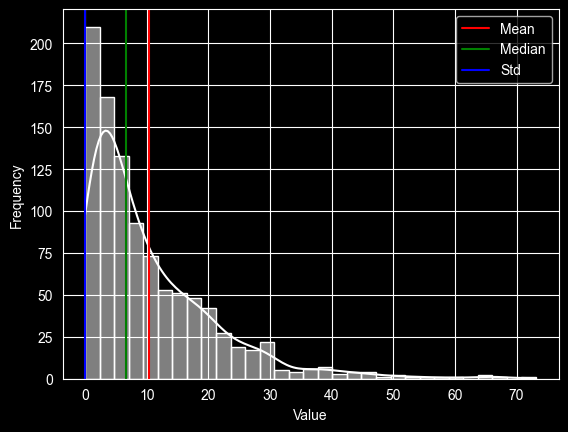

In [34]:
sns.histplot(positive_skew, kde=True, color='w')
plt.axvline(positive_skew.mean(), color='r',label='Mean')
plt.axvline(positive_skew.median(), color='g',label='Median')
plt.axvline(positive_skew.mode()[0], color='b',label='Std')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

In [36]:
from scipy.stats import skew, kurtosis

skewness = skew(positive_skew)

if -0.5 <= skewness <= 0.5:
    print(f'Skewness is {skewness:.2f}: Symmetric. No transformation needed.')
elif -1 <= skewness <= 1:
    print(f'Skewness is {skewness:.2f}: Moderately skewed. Monitoring suggested.')
else:
    print(f'Skewness is {skewness:.2f}: Highly skewed. Transformation is needed.')


Skewness is 1.95: Highly skewed. Transformation is needed.


In [41]:
'''
    Q.6
        - Generate two datasets: one with normal distribution and another with a peaked distribution (e.g., Laplace).
        - Plot KDE curves of both datasets on the same graph to compare peakedness.
        - Calculate and print the kurtosis values of both datasets.
        - Interpret the kurtosis values as mesokurtic, leptokurtic, or platykurtic.
'''

normal = pd.Series(np.random.normal(11,3,1000))
normal.head()

0     5.574974
1    10.581458
2    12.830401
3    12.026358
4     8.848151
dtype: float64

In [42]:
peaked = pd.Series(np.random.standard_t(3,1000))
peaked.head()

0    2.341323
1    0.356539
2   -0.158990
3   -0.733422
4    2.405248
dtype: float64

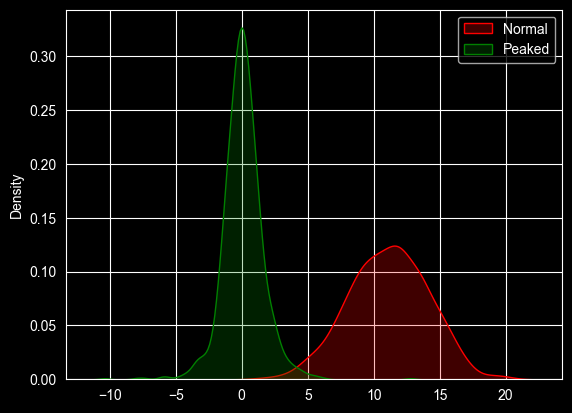

In [43]:
sns.kdeplot(normal, color='r', label='Normal', fill=True)
sns.kdeplot(peaked, color='g', label='Peaked', fill=True)
plt.legend()
plt.show()

In [45]:
normal_k = kurtosis(normal)

print('Normal Dataset: ')
if -0.30 <= normal_k <= 0.30:
    print(f'Kurtosis is {normal_k:.2f}: Mesokurtic')
elif normal_k < -0.30:
    print(f'Kurtosis is {normal_k:.2f}: Platykurtic')
else:
    print(f'Kurtosis is {normal_k:.2f}: Leptokurtic')


Normal Dataset: 
Kurtosis is -0.08: Mesokurtic


In [47]:
peaked_k = kurtosis(peaked)

print('Peaked Dataset: ')
if -0.30 <= peaked_k <= 0.30:
    print(f'Kurtosis is {peaked_k:.2f}: Mesokurtic')
elif peaked_k < -0.30:
    print(f'Kurtosis is {peaked_k:.2f}: Platykurtic')
else:
    print(f'Kurtosis is {peaked_k:.2f}: Leptokurtic')

Peaked Dataset: 
Kurtosis is 8.05: Leptokurtic
